In [1]:
import pandas as pd
import numpy as np
from os import path,listdir
from BaselineRemoval import BaselineRemoval
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

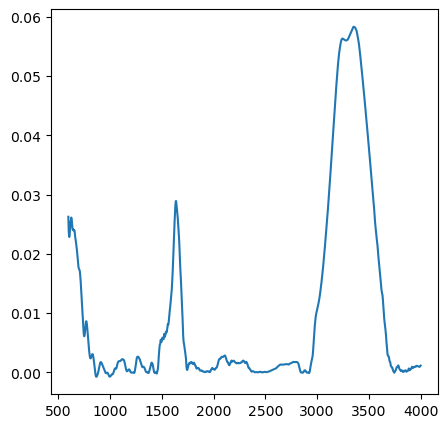


Number Cleaned:1. Length of y:901


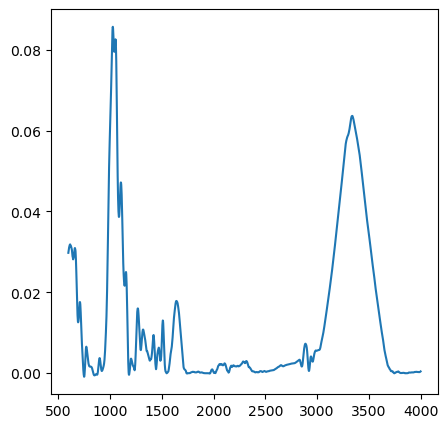


Number Cleaned:2. Length of y:901
WARING max iteration reached!


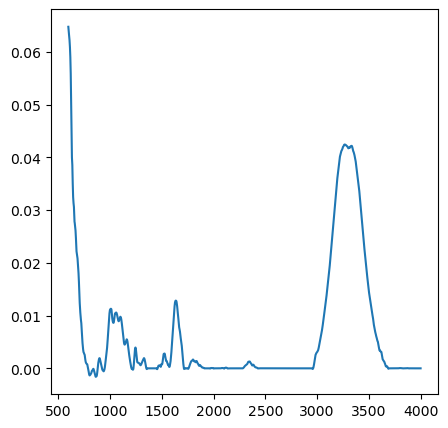


Number Cleaned:3. Length of y:901


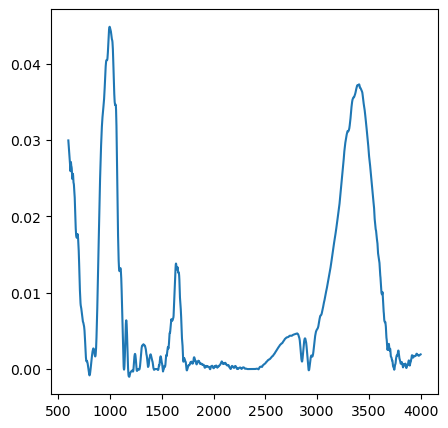


Number Cleaned:4. Length of y:901
WARING max iteration reached!


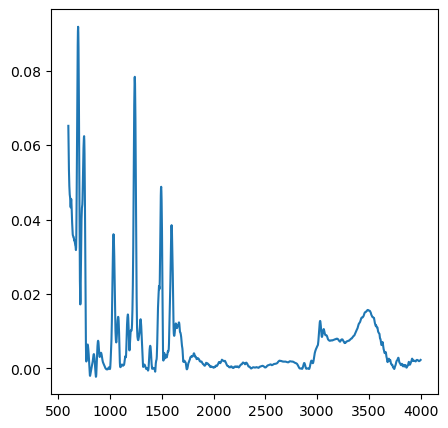


Number Cleaned:5. Length of y:901


In [13]:
wavenumber=np.array(range(400,4001,4))
dict={}
dict['lambda']=wavenumber
path = r'C:\Users\ks\Desktop\Spectra Identification\IR'
list_files=listdir(path)

num_cleaned=0
failure=[]
for files in list_files:
    df=pd.read_csv(path.join(path,files),header=0)
    Data1=df['x'].to_numpy()
    Data2=df['y'].to_numpy() 
    ind=Data1.argsort() # Sort wavenumber and absorbance
    X=Data1[ind]
    Y=Data2[ind]
    y_new=[]
    
    if X.shape[0] == 0:
        failure.append(files) # Remove empty files
        continue
    if Y.shape[0] == 0:
        failure.append(files) # Remove empty files
        continue
    if X[-1]<=400:
        failure.append(files) # Remove spectra below minimum wavenumber range
        continue
    if X[0]>=4000:
        failure.append(files) # Remove spectra above maximum wavenumber range
        continue
        
    
    Basobj=BaselineRemoval(Y)
    
    try:
     
        Y=Basobj.ZhangFit()
        #Y=Basobj.IModPoly(degree =3)
    except:
        failure.append(files)
        continue
    Y=savgol_filter(Y,19,3)
# Rest of the code finds the wavenumber in data closest to each wavenumber in chosen range at chosen resolution and maps the absorbances
    if X[0] <= 400:
        if X[-1]<4000:
            dummy=np.square(wavenumber-X[-1])
            index2=np.argmin(dummy)
        else:
            index2=900
            
        for w in wavenumber[:index2+1]:
            dummy= np.square(X-w)
            ind=np.argmin(dummy)
            y_new.append(Y[ind])
        if index2!=900:
            for i in range(index2+1,901):
                y_new.append(0)
                
    if X[0]>400:
        dummy=np.square(wavenumber-X[0])
        index=np.argmin(dummy)
        if X[-1]<4000:
            dummy=np.square(wavenumber-X[-1])
            index2=np.argmin(dummy)
        else:
            index2=900
        y_new=[0]*(index)
        for w in wavenumber[index:index2+1]:
            dummy= np.square(X-w)
            ind=np.argmin(dummy)
            y_new.append(Y[ind])
        if index2!=900:
            for i in range(index2+1,901):
                y_new.append(0)

    dict[files]=y_new
    num_cleaned+=1
    
    print('Number Cleaned:{}. Length of y:{}'.format(num_cleaned,len(y_new)))
    
    
df=pd.DataFrame(dict)
df.to_csv(path.join(path,'BaselineCorrected'+'.csv'))
    

In [3]:
dict

{'lambda': array([ 400,  404,  408,  412,  416,  420,  424,  428,  432,  436,  440,
         444,  448,  452,  456,  460,  464,  468,  472,  476,  480,  484,
         488,  492,  496,  500,  504,  508,  512,  516,  520,  524,  528,
         532,  536,  540,  544,  548,  552,  556,  560,  564,  568,  572,
         576,  580,  584,  588,  592,  596,  600,  604,  608,  612,  616,
         620,  624,  628,  632,  636,  640,  644,  648,  652,  656,  660,
         664,  668,  672,  676,  680,  684,  688,  692,  696,  700,  704,
         708,  712,  716,  720,  724,  728,  732,  736,  740,  744,  748,
         752,  756,  760,  764,  768,  772,  776,  780,  784,  788,  792,
         796,  800,  804,  808,  812,  816,  820,  824,  828,  832,  836,
         840,  844,  848,  852,  856,  860,  864,  868,  872,  876,  880,
         884,  888,  892,  896,  900,  904,  908,  912,  916,  920,  924,
         928,  932,  936,  940,  944,  948,  952,  956,  960,  964,  968,
         972,  976,  980,  9

In [14]:
df=pd.DataFrame(dict)
df.to_csv('Bio_5comp_Baseline.csv')


In [12]:
for f in failure:
    with open(r'C:\Users\Karthik\Desktop\Spectra Identification\Clean_Failure_baseline.txt','a')  as file:
            content = '{}\n'.format(f)
            file.write(content)

In [7]:
failure

['PC1.csv', 'PC2.csv', 'PC3.csv', 'PC4.csv']